<a href="https://colab.research.google.com/github/peeyushsinghal/dimensionality_reduction/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction

## Singular Value Decomposition (SVD)

### SVD using Numpy

In [1]:
import numpy as np

In [2]:
#Creating a matrix A
A = np.array([[3,4,3],[1,2,3],[4,2,1]])
A

array([[3, 4, 3],
       [1, 2, 3],
       [4, 2, 1]])

In [5]:
#Performing SVD
U, S, VT = np.linalg.svd(A)
print (f'U = \n{U} \n S = \n {S} \n VT = {VT} ')

U = 
[[-0.73553325 -0.18392937 -0.65204358]
 [-0.42657919 -0.62196982  0.65664582]
 [-0.52632788  0.76113306  0.37901904]] 
 S = 
 [7.87764972 2.54031671 0.69958986] 
 VT = [[-0.60151068 -0.61540527 -0.5093734 ]
 [ 0.73643349 -0.18005275 -0.65210944]
 [ 0.30959751 -0.76737042  0.5615087 ]] 


In [6]:
#Checking if we can remake the original matrix using U,S,VT
A_remake = (U @ np.diag(S) @ VT)
print(A_remake)

[[3. 4. 3.]
 [1. 2. 3.]
 [4. 2. 1.]]


### SVD using scikit-learn (TruncatedSVD)

In [7]:
#Importing required modules
import numpy as np
from sklearn.decomposition import TruncatedSVD

In [19]:
#Creating array 
A = np.array([[3,4,3],[1,2,3],[4,2,1]])
A

array([[3, 4, 3],
       [1, 2, 3],
       [4, 2, 1]])

In [21]:
#Fitting the SVD class
n_components = 2
trun_svd =  TruncatedSVD(n_components = n_components)
A_transformed = trun_svd.fit_transform(A)

In [18]:
print("Singular values:")
print(trun_svd.singular_values_)

Singular values:
[7.87764972 2.54031671]


In [22]:
#Printing the transformed matrix
print(f'Transformed Matrix: with {n_components} components')
print(A_transformed)

Transformed Matrix: with 2 components
[[ 5.7942733  -0.46723885]
 [ 3.3604414  -1.58000033]
 [ 4.14622666  1.93351902]]


## Principal Component Analysis (PCA)


## Latent Discrimination Analysis (LDA)

### LDA using scikit-learn

In [33]:
# Importing Libraries
import numpy as np
import pandas as pd

In [34]:
# Importing Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
# Data Pre-processing
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [43]:
# Test Train split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

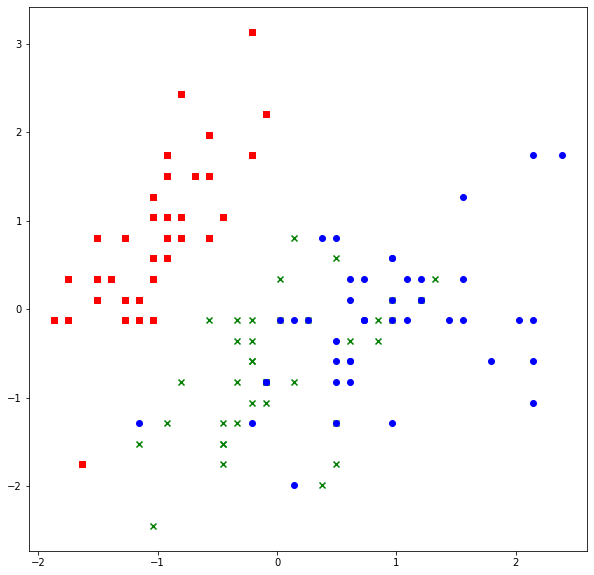

In [45]:
import matplotlib.pyplot as plt
markers = ['s','x','o']
colors = ['r','g','b']

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
  ax0.scatter(X_train[:,0][y_train==l],X_train[:,1][y_train==l],c=c,marker=m)

In [46]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_post_lda = lda.fit_transform(X_train, y_train)
X_test_post_lda = lda.transform(X_test)

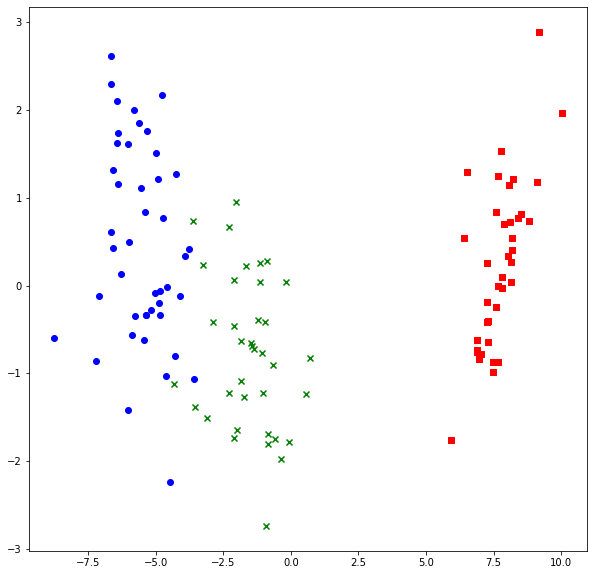

In [50]:
# Visualizing LDA 
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
  ax0.scatter(X_train_post_lda[:,0][y_train==l],X_train_post_lda[:,1][y_train==l],c=c,marker=m)